In [195]:
import os
BASH_PATH = '/content'
CSV_PATH = f'{BASH_PATH}/csv_files'
OUT_PATH = f'{BASH_PATH}/outputs'
os.makedirs(CSV_PATH, exist_ok=True)
os.makedirs(OUT_PATH, exist_ok=True)

## Objective
Analyze the relationship between Bitcoin market sentiment (Fear vs Greed ) and treader behaviour using Hyperliquid historical data.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df_sentiment = pd.read_csv('/content/csv_files/fear_greed_index.csv')
df_trade = pd.read_csv('/content/csv_files/historical_trade_data.csv')

In [198]:
df_trade.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [199]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [200]:
df_sentiment.info()
df_sentiment.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


(2644, 4)

In [201]:
df_trade.info()
df_trade.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

(211224, 16)

## step 1: Data Loading
-Loaded the trader transaction dataset and bitcoin market sentiment dataset.
-Ensure both dataset use a common Date column for further analysis.
-Performed initial checks to confirm data was loaded correctly

In [202]:
df_trade.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [203]:
df_sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [204]:
df_sentiment['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [205]:
def map_sentiment(x):
    if x in ['Extrem Fear','Fear']:
        return 'Fear'
    elif x in ['Greed','Extrem Greed']:
        return 'Greed'
    else:
        return 'Neutral'
df_sentiment['Market_Sentiment'] = df_sentiment['classification'].apply(map_sentiment)
df_sentiment[df_sentiment['Market_Sentiment'] != 'Neutral']

,timestamp,value,classification,date,Market_Sentiment
0,1517463000,30,Fear,2018-02-01,Fear
2,1517635800,40,Fear,2018-02-03,Fear
6,1517981400,36,Fear,2018-02-07,Fear
7,1518067800,30,Fear,2018-02-08,Fear
8,1518154200,44,Fear,2018-02-09,Fear
...,...,...,...,...,...
2637,1745645400,65,Greed,2025-04-26,Greed
2638,1745731800,61,Greed,2025-04-27,Greed
2640,1745904600,60,Greed,2025-04-29,Greed
2641,1745991000,56,Greed,2025-04-30,Greed


In [206]:
df_trade.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [207]:
df_trade = df_trade[['Account','Timestamp IST','Direction','Size USD','Closed PnL','Fee','Size Tokens']]

In [208]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_trade['Timestamp IST'] = pd.to_datetime(df_trade['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_trade['date'] = df_trade['Timestamp IST'].dt.date
df_trade['date'] = pd.to_datetime(df_trade['date'])

In [209]:
df_trade['Direction'] = df_trade['Direction'].str.capitalize()
df_trade['Direction'].value_counts()

,count
Direction,
Open long,49895
Close long,48678
Open short,39741
Close short,36013
Sell,19902
Buy,16716
Spot dust conversion,142
Short > long,70
Long > short,57


In [210]:
df_trade = df_trade.dropna(subset=['Size USD','Direction','Closed PnL'])
df_trade = df_trade[df_trade['Size USD'] > 0]

## step 2: Data Understanding and Cleaning
The trader dataset contains multiple columns. For analysis the relevent colunms are selected
-Timestamp -> converted to date
-Direction -> Buy/Sell
-Size USD -> measures of trade volume
-Close PNL -> profit/loss per trade
-Account,Fee,Size Token -> optional
Invaild or Zero values trade were removed and direction value were standdized

In [211]:
# Group by date
daily_trader = df_trade.groupby('date').agg(total_trades = ('Account', 'count') ,
#Number of trades
total_volume = ('Size USD','sum'),
#Total usd volume
avg_pnl = ('Closed PnL','mean'),
#Average profit/loss
buy_trades = ('Direction',lambda x: (x=='Buy').sum()), #Buy count
sell_trades = ('Direction',lambda x: (x=='Sell').sum() ) #sell count
).reset_index()

In [212]:
#keep only relevent columns from sentiment dataset
sentiment_subset = df_sentiment[['date','Market_Sentiment']]
#merge on Date
df_final = pd.merge(daily_trader,sentiment_subset,on = 'date',how='inner')

In [213]:
df_final.head()

,date,total_trades,total_volume,avg_pnl,buy_trades,sell_trades,Market_Sentiment
0,2023-05-01,3,477.00,0.000000,0,0,Greed
1,2023-12-05,9,50005.83,0.000000,0,0,Neutral
2,2023-12-14,11,113203.35,-18.675885,0,0,Greed
3,2023-12-15,2,10609.95,-12.316017,0,0,Greed
4,2023-12-16,3,15348.77,0.000000,0,0,Greed


## step 3: Daily Aggregation and Merge with Market Sentiment
- Trader-level data was aggregated daily to calculate
- Total number of trade
- Total USD volume
- number of Buy and Sell trade
- The Aggregated dataset was then merged with the Market Sentiment (Fear/Greed) data for further analysis.

/tmp/ipython-input-3447795346.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3447795346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


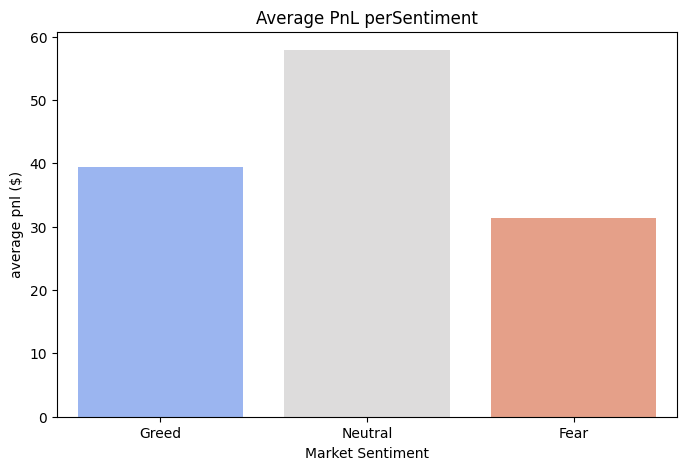

In [214]:
import os
os.makedirs("outputs",exist_ok=True)
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_final,
    x= 'Market_Sentiment',
    y = 'avg_pnl',
    ci = None,
    palette = 'coolwarm'
)
plt.title('Average PnL perSentiment')
plt.ylabel('average pnl ($)')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/avg_pnl_sentiment.png')
plt.show()

/tmp/ipython-input-4089767546.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-4089767546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


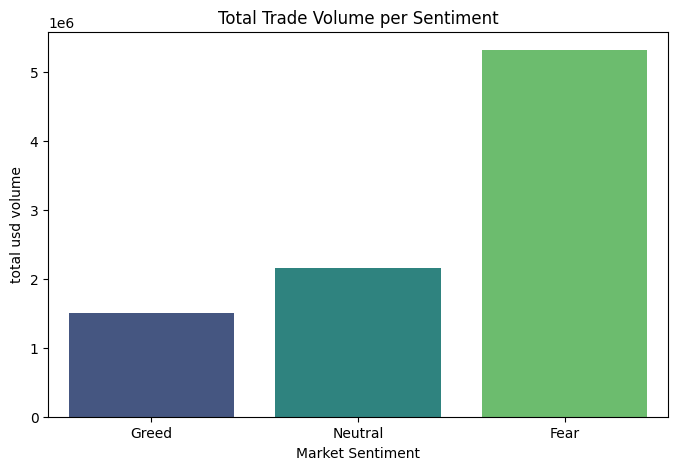

In [215]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_final,
    x= 'Market_Sentiment',
    y = 'total_volume',
    ci = None,
    palette = 'viridis'
)
plt.title('Total Trade Volume per Sentiment')
plt.ylabel('total usd volume')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/total_volume_sentiment.png')
plt.show()

/tmp/ipython-input-2460111740.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2460111740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


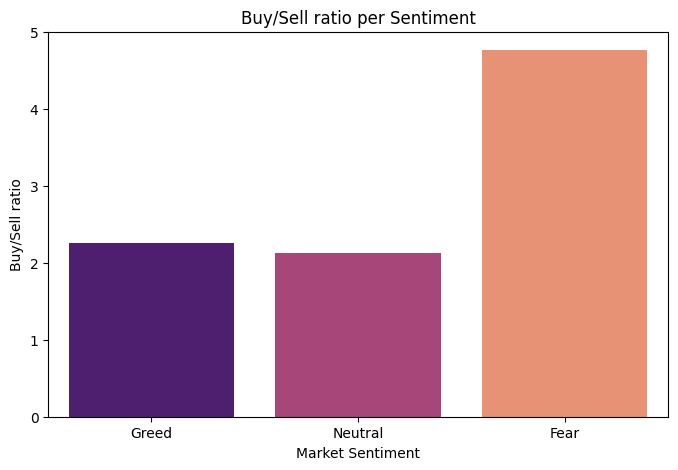

In [216]:
#Create Buy/Sell ratio
df_final['buy_sell_ratio'] = df_final['buy_trades'] / (df_final['sell_trades'] +1)
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_final,
    x= 'Market_Sentiment',
    y = 'buy_sell_ratio',
    ci = None,
    palette = 'magma'
)
plt.title('Buy/Sell ratio per Sentiment')
plt.ylabel('Buy/Sell ratio')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/Buy_Sell_ratio.png')
plt.show()

/tmp/ipython-input-1882500191.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1882500191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


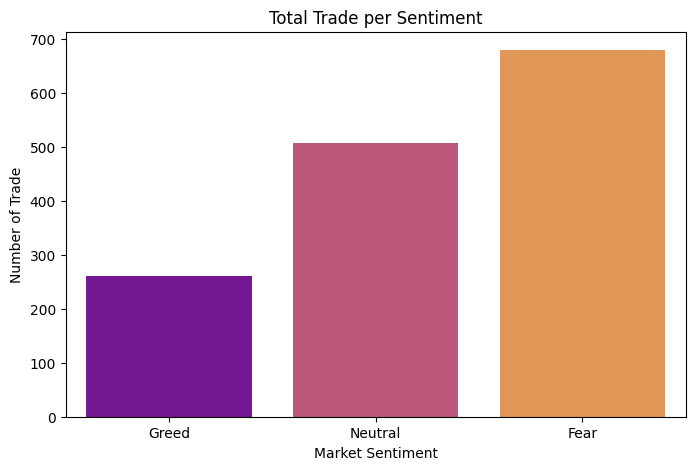

In [217]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_final,
    x= 'Market_Sentiment',
    y = 'total_trades',
    ci = None,
    palette = 'plasma'
)
plt.title('Total Trade per Sentiment')
plt.ylabel('Number of Trade')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/total_trades_sentiment.png')
plt.show()

## step 4: Eploratory Data Analysis
- Compared Fear vs Greed days for:
 -Avg PnL
 -Total USD volume
 -Buy/Sell ratio
 -Trade count
- Visualization saved in outputs folder
- key insight:
 -avg PnL is higher on greed days
 -Trade volume,buy/sell ratio,total trade is higher during fear


In [218]:
# Aggregate metrics by Market Sentiment
df_summary = df_final.groupby('Market_Sentiment').agg(
    avg_pnl = ('avg_pnl','mean'),
    total_volume = ('total_volume','sum'),
    total_trades = ('total_trades','sum'),
    avg_buy_sell_ratio = ('buy_sell_ratio' , 'mean')
).reset_index()
df_summary

,Market_Sentiment,avg_pnl,total_volume,total_trades,avg_buy_sell_ratio
0,Fear,31.308506,4.833248e+08,61826,4.767353
1,Greed,39.433225,2.885825e+08,50283,2.263881
2,Neutral,57.867935,4.191915e+08,99066,2.130169


## step 5: Insight Summary
- Greed days : show the highest average PnL, indicating traders are more profitable during bullish sentiment.
- Fear days : have slightly lower PnL but still strong tranding trading activity, suggesting active participation even in cautions markets.
-Neural Sentiment : records the highest total volume and trade count ,indicating consistent and steady trading behaviour.
-Buy/Sell ratio : is highest during Fear , implyingtraders tend to buy more aggressively during fearful market conditions.
-Ovelall, market sentiment has a clear impact on trader profitability , volume and bidirectional bias.

In [219]:
df_summary.to_csv('outputs/summary_insight.csv', index=False)